<a href="https://colab.research.google.com/github/EndymionSleeping/1KB570-project/blob/main/matb_project_v3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init
Handling dependancied and importing datasets

In [1]:
from google.colab import output
output.enable_custom_widget_manager()


In [2]:
try:
    import google.colab  # type: ignore # noqa: F401
    %pip install git+https://github.com/hackingmaterials/matbench
except ImportError:
    print("not in Colab")

  Cloning https://github.com/hackingmaterials/matbench to /tmp/pip-req-build-8or411f8
  Running command git clone --filter=blob:none --quiet https://github.com/hackingmaterials/matbench /tmp/pip-req-build-8or411f8
  Resolved https://github.com/hackingmaterials/matbench to commit 936176db18ca4cd7b38cbd957c017a5bac770c6b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 20.4 MB/s eta 0:00

In [3]:
from matbench.bench import MatbenchBenchmark
mb = MatbenchBenchmark(autoload=False)

2024-10-17 10:00:11 INFO     Initialized benchmark 'matbench_v0.1' with 13 tasks: 
['matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels']


INFO:matbench:Initialized benchmark 'matbench_v0.1' with 13 tasks: 
['matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels']


In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# Get first task

In [5]:
dsname = "matbench_perovskites"#"matbench_mp_is_metal" #"matbench_phonons"

for task in mb.tasks:
    if task.dataset_name == dsname:
      print(task.dataset_name)
      break

#mb.matbench_dielectric.load()
#mb.matbench_phonons.load()
#mb.matbench_mp_is_metal.load()
mb.matbench_perovskites.load()

for fold in task.folds:

      # Inputs are either chemical compositions as strings
      # or crystal structures as pymatgen.Structure objects.
      # Outputs are either floats (regression tasks) or bools (classification tasks)
      train_inputs, train_outputs = task.get_train_and_val_data(fold)

matbench_perovskites
2024-10-17 10:00:20 INFO     Loading dataset 'matbench_perovskites'...


INFO:matbench.task:Loading dataset 'matbench_perovskites'...


Fetching matbench_perovskites.json.gz from https://ml.materialsproject.org/projects/matbench_perovskites.json.gz to /usr/local/lib/python3.10/dist-packages/matminer/datasets/matbench_perovskites.json.gz


Fetching https://ml.materialsproject.org/projects/matbench_perovskites.json.gz in MB: 4.194304MB [00:00, 94.06MB/s]                 


2024-10-17 10:00:37 INFO     Dataset 'matbench_perovskites loaded.


INFO:matbench.task:Dataset 'matbench_perovskites loaded.


# Prepare the data

In [6]:
train_inputs[len(train_inputs)-1]

<ipython-input-6-a498127e76ac>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_inputs[len(train_inputs)-1]


Structure Summary
Lattice
    abc : 3.608501682090402 3.608501682090402 3.608501682090402
 angles : 90.0 90.0 90.0
 volume : 46.987326623026846
      A : 3.608501682090402 0.0 0.0
      B : 0.0 3.608501682090402 0.0
      C : 0.0 0.0 3.608501682090402
    pbc : True True True
PeriodicSite: Zn (0.004004, 0.0, 0.0) [0.00111, 0.0, 0.0]
PeriodicSite: Be (1.822, 1.804, 1.804) [0.5048, 0.5, 0.5]
PeriodicSite: F (1.805, 0.0, 1.804) [0.5003, 0.0, 0.5]
PeriodicSite: N (1.808, 1.804, 0.0) [0.5011, 0.5, 0.0]
PeriodicSite: O (0.009746, 1.804, 1.804) [0.002701, 0.5, 0.5]

In [7]:
train_inputs.keys()

Index(['mb-perovskites-00002', 'mb-perovskites-00003', 'mb-perovskites-00004',
       'mb-perovskites-00005', 'mb-perovskites-00006', 'mb-perovskites-00007',
       'mb-perovskites-00008', 'mb-perovskites-00009', 'mb-perovskites-00010',
       'mb-perovskites-00011',
       ...
       'mb-perovskites-18917', 'mb-perovskites-18918', 'mb-perovskites-18919',
       'mb-perovskites-18920', 'mb-perovskites-18921', 'mb-perovskites-18922',
       'mb-perovskites-18923', 'mb-perovskites-18924', 'mb-perovskites-18925',
       'mb-perovskites-18926'],
      dtype='object', name='mbid', length=15143)

In [8]:
#train_inputs['mb-mp-is-metal-000001'].as_dict()['sites']

In [9]:
!pip install PyAstronomy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.3/779.3 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 8.0 MB/s eta 0:00:00
  Created wheel for PyAstronomy: filename=PyAstronomy-0.22.0-py3-none-any.whl size=557910 sha256=1a2489778b99b41e6b8010dc3a28e0c3ffa271f91e0a9b8ed089368d9bb6e0fc
  Stored in directory: /root/.cache/pip/wheels/a3/53/20/11d5947fd6a452201469232799c57238f2359a090cbd90d2f0
Successfully built PyAstronomy


In [10]:

from PyAstronomy import pyasl
an = pyasl.AtomicNo()
QQ = 0

def extract_features(structure_data):
    global QQ
    parse_structure_data = structure_data.as_dict()
    lattice_params = structure_data.lattice.abc
    angles = structure_data.lattice.angles
    volume = structure_data.lattice.volume
    sites = []
    for site in parse_structure_data['sites']:
      #sites.append(site['label'])
      sites.append(an.getAtomicNo(site['label']))
      sites.extend(site['abc'])

    if QQ < len(sites):
      QQ = len(sites)
      print(QQ)

    max_length = 20
    padded_sites = np.zeros(max_length)
    padded_sites[:len(sites)] = sites[:min(len(sites), max_length)]
    features = []
    features.extend(lattice_params)
    features.extend(angles)
    features.append(volume)
    features.extend(padded_sites)
    return features
#3    np.concatenate([lattice_params, angles, volume, padded_sites])

X = np.array([extract_features(structure) for structure in train_inputs])
y = np.array(train_outputs)
print(y)
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sc_Y = StandardScaler()
Y_train = sc_Y.fit_transform(y.reshape(-1, 1))
Y_train = y
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, Y_train, test_size=0.15, random_state=42)



20
[1.52 1.48 1.24 ... 1.66 2.12 1.5 ]


In [11]:
"""
QQ = 0
def extract_features(structure_data):
    global QQ
    lattice_params = structure_data.lattice.abc
    angles = structure_data.lattice.angles
    volume = structure_data.lattice.volume

    # Extract atomic coordinates and species
    atomic_coords = [site.frac_coords for site in structure_data.sites]
    atomic_species = [site.specie.Z for site in structure_data.sites]
    atomic_coords2 = list(atomic_coords)
    atomic_cs = zip(atomic_species, atomic_coords2)
    qqqq = [[a,b] for (a,b) in atomic_cs]
    #print(qqqq)
    # Flatten atomic coordinates
    atomic_coords_flat = np.array(atomic_coords).flatten()

    if QQ < len(atomic_coords_flat):

      print(f'atomic_coords {atomic_coords}')
      print(f'atomic_species {atomic_species}')
      print(f'zip {zip(atomic_species, atomic_coords)}')
      print(f'zip {list(zip(atomic_species, atomic_coords))}')
      q = list(zip(atomic_species, atomic_coords))
      print(q)
      for item in q:
        item = list(item)
        print(type(item))
        for subitem in item:
          if isinstance(subitem, np.ndarray):
            subitem = np.array(subitem).flatten()
          print(type(subitem))
      print(f'atomic_coords_flat {atomic_coords_flat}')

      QQ = len(atomic_coords_flat)
      #print(QQ)
    # Ensure both atomic coordinates and species are of length 288
    max_length = 72#288
    atomic_coords_padded = np.zeros(max_length)
    atomic_species_padded = np.zeros(max_length)

    # Fill in with actual values up to their original lengths
    atomic_coords_padded[:len(atomic_coords_flat)] = atomic_coords_flat[:min(len(atomic_coords_flat), max_length)]
    atomic_species_padded[:len(atomic_species)] = atomic_species[:min(len(atomic_species), max_length)]

    # Concatenate features
    features = np.concatenate([lattice_params, angles, [volume], atomic_coords_padded, atomic_species_padded])

    return features



X = np.array([extract_features(structure) for structure in train_inputs])
y = np.array(train_outputs)
print(y)
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sc_Y = StandardScaler()
Y_train = sc_Y.fit_transform(y.reshape(-1, 1))
Y_train = y
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, Y_train, test_size=0.15, random_state=42)


"""


"\nQQ = 0\ndef extract_features(structure_data):\n    global QQ\n    lattice_params = structure_data.lattice.abc\n    angles = structure_data.lattice.angles\n    volume = structure_data.lattice.volume\n\n    # Extract atomic coordinates and species\n    atomic_coords = [site.frac_coords for site in structure_data.sites]\n    atomic_species = [site.specie.Z for site in structure_data.sites]\n    atomic_coords2 = list(atomic_coords)\n    atomic_cs = zip(atomic_species, atomic_coords2)\n    qqqq = [[a,b] for (a,b) in atomic_cs]\n    #print(qqqq)\n    # Flatten atomic coordinates\n    atomic_coords_flat = np.array(atomic_coords).flatten()\n\n    if QQ < len(atomic_coords_flat):\n\n      print(f'atomic_coords {atomic_coords}')\n      print(f'atomic_species {atomic_species}')\n      print(f'zip {zip(atomic_species, atomic_coords)}')\n      print(f'zip {list(zip(atomic_species, atomic_coords))}')\n      q = list(zip(atomic_species, atomic_coords))\n      print(q)\n      for item in q:\n      

# Linear regression model

In [12]:
X_train.shape

(12871, 27)

In [13]:
X[0].shape

(27,)

In [14]:
X_scaled[0]

array([ 0.46959344,  0.46959344,  0.46959344,  0.        ,  0.        ,
        0.        ,  0.38828055,  1.25235202,  1.63979594, -0.31055573,
       -0.27504536,  0.40184544, -4.15834007,  0.        ,  0.        ,
       -0.33229479,  0.45342217, -0.12141805,  0.        ,  0.87330327,
        0.22880056,  0.        , -0.07945522,  0.40975683,  1.41433902,
        0.        ,  0.        ])

# ML

In [15]:
def build_model(input_shape):
  """
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(151,)))#input_shape=(,7)))input_dim=583
    layers.Dropout(0.1),
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    #model.add(layers.Dense(1))  # Output layer for regression
    print(model.summary())
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    """
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu'))#input_shape=(,7)))input_dim=583,   , input_shape=(151,)
  layers.Dropout(0.5),
  model.add(layers.Dense(128, activation='relu'))
  layers.Dropout(0.3),
  model.add(layers.Dense(256, activation='relu'))
  layers.Dropout(0.1),
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1, activation='linear'))
  #model.add(layers.Dense(1))  # Output layer for regression
  print(model.summary())
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  ##accuracy mae
  return model


In [16]:
"""
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=583))#input_shape=(,7)))input_dim=583
    layers.Dropout(0.5),
    model.add(layers.Dense(128, activation='relu'))
    layers.Dropout(0.3),
    model.add(layers.Dense(256, activation='relu'))
    layers.Dropout(0.1),
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    #model.add(layers.Dense(1))  # Output layer for regression
    print(model.summary())
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
"""

"\n    model = models.Sequential()\n    model.add(layers.Dense(64, activation='relu', input_dim=583))#input_shape=(,7)))input_dim=583\n    layers.Dropout(0.5),\n    model.add(layers.Dense(128, activation='relu'))\n    layers.Dropout(0.3),\n    model.add(layers.Dense(256, activation='relu'))\n    layers.Dropout(0.1),\n    model.add(layers.Dense(128, activation='relu'))\n    model.add(layers.Dense(64, activation='relu'))\n    model.add(layers.Dense(1, activation='linear'))\n    #model.add(layers.Dense(1))  # Output layer for regression\n    print(model.summary())\n    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])\n"

In [23]:
# Build and train the Keras model
model = build_model(X_train.shape[1])


history = model.fit(X_train, y_train, epochs=47, batch_size=256, validation_data=(X_val, y_val))

# Get test data and extract features
test_inputs = task.get_test_data(fold, include_target=False)
X_test = np.array([extract_features(structure) for structure in test_inputs])
X_test_scaled = scaler.transform(X_test)

# Predict on the testing data
predictions = model.predict(X_test_scaled)



train_loss = history.history["loss"][1:]
test_loss = history.history["val_loss"][1:]


# define callbacks for training
save_best = tf.keras.callbacks.ModelCheckpoint(
    "best_model_{}.weights.h5".format(model.name),
    save_best_only=True,
    monitor="mae",
    save_weights_only=True,
)



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/47
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.8727 - mae: 0.6992 - val_loss: 0.3203 - val_mae: 0.4315
Epoch 2/47
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3217 - mae: 0.4370 - val_loss: 0.3088 - val_mae: 0.4198
Epoch 3/47
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2966 - mae: 0.4190 - val_loss: 0.2921 - val_mae: 0.4114
Epoch 4/47
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2860 - mae: 0.4105 - val_loss: 0.2888 - val_mae: 0.4071
Epoch 5/47
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2795 - mae: 0.4055 - val_loss: 0.2827 - val_mae: 0.4031
Epoch 6/47
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2587 - mae: 0.3890 - val_loss: 0.2744 - val_mae: 0.3941
Epoch 7/47
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2584 - mae: 0.3881 - val_loss: 0.2721 - val_mae: 0.3909
Epoch 8/47
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2377 - mae: 0.3704 - val_loss: 0.2878 - val_mae: 0.4078
Epoch 9/47
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2393 

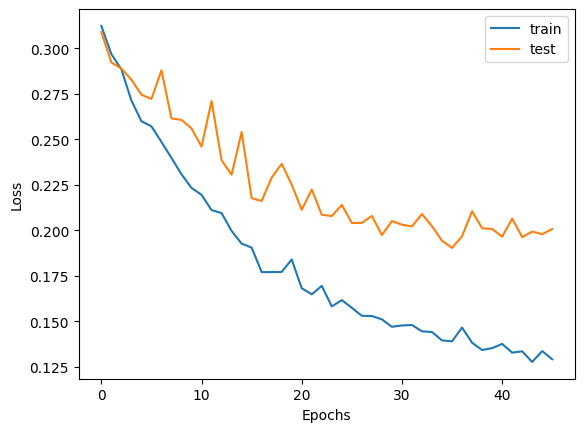

In [24]:
# Prepare and plot loss over time
plt.plot(train_loss,label="train")
plt.plot(test_loss,label="test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Correlation coefficient: 0.8029328986166105


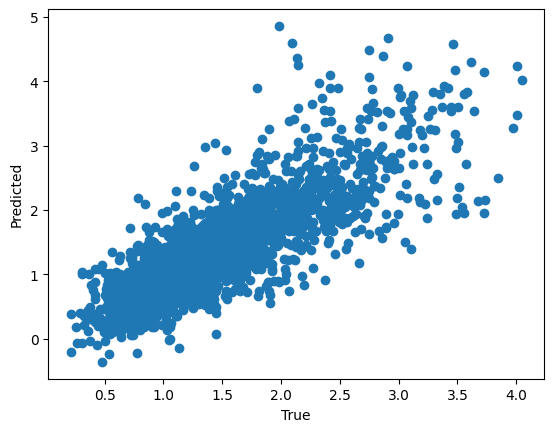

In [25]:
y_pred = model.predict(X_val)[:,0]

print("Correlation coefficient:", np.corrcoef(y_val.T,y_pred)[0,1])
plt.scatter(y_pred,y_val)
plt.ylabel("Predicted")
plt.xlabel("True")
plt.show()